In [120]:
# Dependencies

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [121]:
# Import data from .txt file

with open('movie_data.txt') as json_file:
    data = json.load(json_file)



In [130]:
#Get run times of each movie
run_times = {}
run_list = []

for year in list(data.keys()):
    movies = list(data[year].keys())
    run_list = []
    for movie in movies:
        try:
            run_time = data[year][movie]['Runtime'][0:-4]
            
            run_list.append(run_time)
        except:
            print(" Year: "+year+" Movie: "+movie)
    run_times[year] = run_list


 Year: 1980 Movie: In God We Trust (or Gimme That Prime Time Religion)
 Year: 1981 Movie: Indiana Jones and the Raiders of the Lost Ark
 Year: 1981 Movie: Cinderella1981 Re-release
 Year: 1982 Movie: Indiana Jones and the Raiders of the Lost Ark
 Year: 1982 Movie: Cinderella1981 Re-release
 Year: 1982 Movie: Bambi1982 Re-release
 Year: 1982 Movie: Indiana Jones and the Raiders of the Lost Ark1982 Re-release
 Year: 1983 Movie: Snow White and the Seven Dwarfs1983 Re-release
 Year: 1984 Movie: The Jungle Book1984 Re-release
 Year: 1985 Movie: E.T. the Extra-Terrestrial1985 Re-release
 Year: 1986 Movie: One Hundred and One Dalmatians1985 Re-release
 Year: 1987 Movie: Snow White and the Seven Dwarfs1987 Re-release
 Year: 1987 Movie: Cinderella1987 Re-release
 Year: 1988 Movie: Bambi1988 Re-release
 Year: 1988 Movie: The Fox and the Hound1988 Re-release
 Year: 1989 Movie: Peter Pan1989 Re-release
 Year: 1990 Movie: The Jungle Book1990 Re-release
 Year: 1991 Movie: One Hundred and One Dalmati

In [124]:
#Change values from string to int
for year in run_times.keys():    
    for i in range(0,len(run_times[year])):
        try:
            run_times[year][i]=int(run_times[year][i])
        except:
            print(f'Runtime not found {year, i}')




Runtime not found ('1989', 48)
Runtime not found ('1996', 28)
Runtime not found ('2005', 26)
Runtime not found ('2010', 34)
Runtime not found ('2013', 0)


In [126]:
#Remove the null values
run_times['1989'].remove('')
run_times['1996'].remove('')
run_times['2005'].remove('')
run_times['2010'].remove('')
run_times['2013'].remove('')

In [127]:
#Get runtime averages of movies by year
avg_run_time = []
for year in run_times.keys():
    avg = np.average(run_times[year])
    avg_run_time.append(avg)



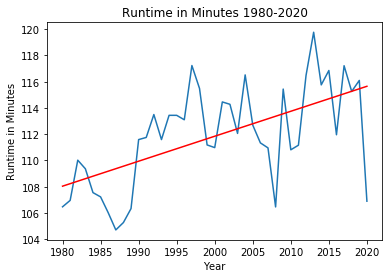

The P-value is: 5.3159704708210064e-05
The R-Value is : 0.587844435855909


In [129]:
#Plot
plt.plot(avg_run_time)

plt.xticks((0,5,10,15,20,25,30,35,40), 
           labels=('1980', '1985', '1990', '1995', '2000', '2005', '2010', '2015', '2020'))
plt.xlabel('Year')
plt.ylabel('Runtime in Minutes')
plt.title('Runtime in Minutes 1980-2020')
(slope, intercept, rvalue, pvalue, stderr) = linregress(range(41), avg_run_time)
regress_values = range(41) * slope + intercept
plt.plot(range(41),regress_values,"r-")
plt.show()
print(f'The P-value is: {pvalue}')
print(f'The R-Value is : {rvalue}')
